# Objectifs

Les objectifs de la lecon sont les suivants:
* Enoncer H0 et H1 pour chaque test
* Calculer en Python les p-valeurs
* Interpréter les résultats

# Importer les librairies

In [1]:
import pandas as pd
from scipy import stats

# Data
from sklearn import datasets

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loader les données
iris = datasets.load_iris()

# Obtenir les features
features = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
# Obtenir la target
target = pd.DataFrame(
    data=iris.target,
    columns=["species"]
)
def target_converter(sp):
    """Apply strings to integers for the targets."""
    if sp == 0:
        return "setosa"
    elif sp == 1:
        return "versicolor"
    else:
        return "virginica"
target["species"] = target["species"].apply(target_converter)

# Concaténer les features et la target dans une meme dataframe
data = pd.concat([features, target], axis=1)

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Split les data
setosa = data[data["species"] == "setosa"]
versicolor = data[data["species"] == "versicolor"]
virginica = data[data["species"] == "virginica"]

# EDA rapide

In [4]:
# Quelques statistiques
print("Setosa:")
display(setosa.describe())

print("Versicolor:")
display(versicolor.describe())

print("Virginica:")
display(virginica.describe())

Setosa:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


Versicolor:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Virginica:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


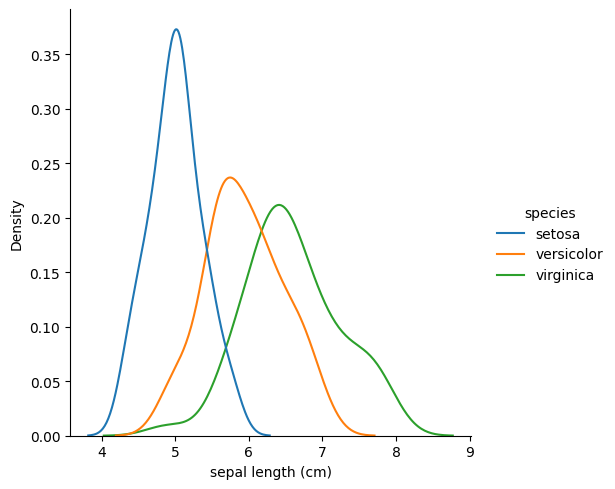

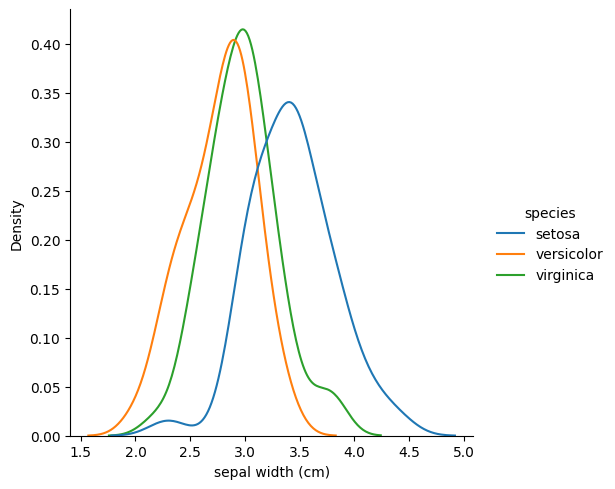

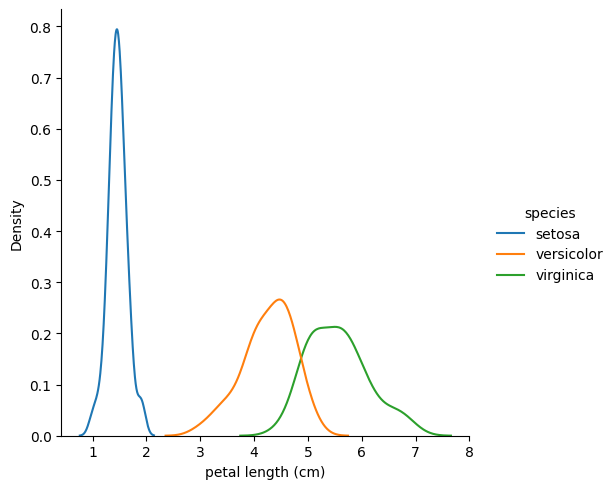

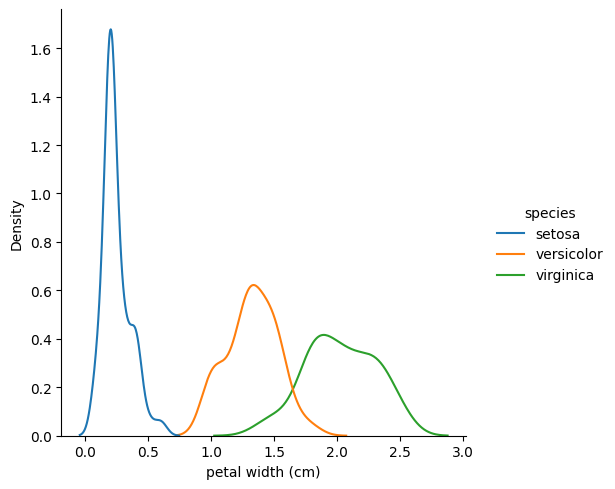

In [5]:
# Quelques visualisations
for col in data.drop(columns=["species"]):
    sns.displot(
        data=data,
        x=col,
        hue="species",
        kind="kde"
    )
    plt.show()

# Two-sample t-test

Rappel de la formule pour calculer la statistique t pour 2 échantillons:
$$ t = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}}} $$
et les *degrés de libertés* de la loi $t$ de Student sont le plus petit de $n_{1}-1$ et $n_{2}-1$ 

La fonction [`stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) de SciPy permet de faire ce t-test de façon automatique en une ligne.

## Hypothèse 1: La longueur de sépale moyenne de la versicolor est égale à la longueur de sépale moyenne de la virginica

$H_0: \mu_{\text{longueur_moyenne_sepale_versicolor}} = \mu_{\text{longueur_moyenne_sepale_virginica}}$, $H_1: \mu_{\text{longueur_moyenne_sepale_versicolor}} \ne \mu_{\text{longueur_moyenne_sepale_virginica}}$

In [6]:
# On set le seuil
alpha = 0.05

# On calcule la statistique t et la p-valeur
t, p_valeur = stats.ttest_ind(
    versicolor["sepal length (cm)"],
    virginica["sepal length (cm)"],
    alternative="two-sided",
    equal_var=False
)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

# Si p-valeur < alpha, on rejète l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejète l'hypothèse nulle.")
    
# Si p-valeur > alpha, on ne rejète pas l'hypothèse nulle
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejète pas l'hypothèse nulle.")

La statistique t est de : -5.629165259719801
La p-valeur associée est de : 1.8661443873771226e-07
Avec un seuil alpha 0.05 on rejète l'hypothèse nulle.


## Hypothèse 2: La largeur de sépale moyenne de la versicolor est égale à la largeur de sépale moyenne de la virginica

$H_0: \mu_{\text{largeur_moyenne_sepale_versicolor}} = \mu_{\text{largeur_moyenne_sepale_virginica}}$, $H_1: \mu_{\text{largeur_moyenne_sepale_versicolor}} \ne \mu_{\text{largeur_moyenne_sepale_virginica}}$

In [7]:
# On set le seuil
alpha = 0.05

# On calcule la statistique t et la p-valeur
t, p_valeur = stats.ttest_ind(
    versicolor["sepal width (cm)"],
    virginica["sepal width (cm)"],
    alternative="two-sided",
    equal_var=False
)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

# Si p-valeur < alpha, on rejète l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejète l'hypothèse nulle.")
    
# Si p-valeur > alpha, on ne rejète pas l'hypothèse nulle
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejète pas l'hypothèse nulle.")

La statistique t est de : -3.2057607502218186
La p-valeur associée est de : 0.0018194834821049677
Avec un seuil alpha 0.05 on rejète l'hypothèse nulle.
